In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../Data/Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


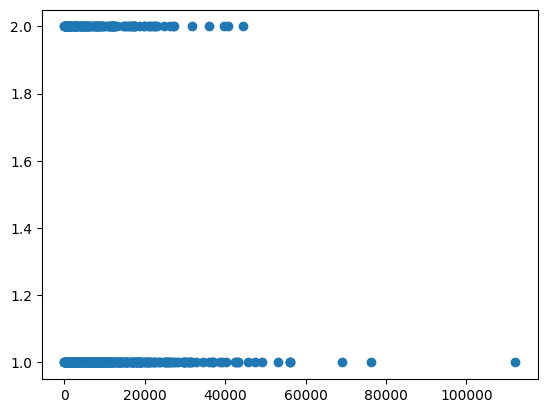

In [3]:
plt.scatter(df['Fresh'], df['Channel'])

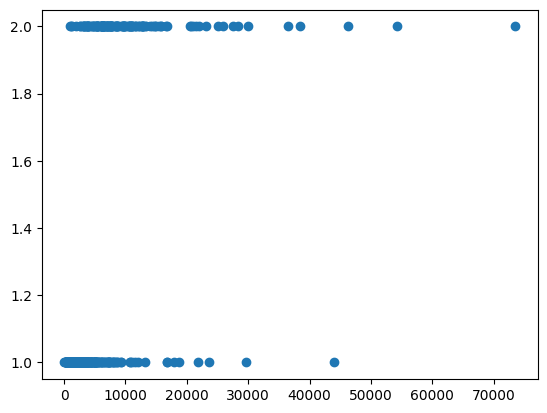

In [4]:
plt.scatter(df['Milk'], df['Channel'])

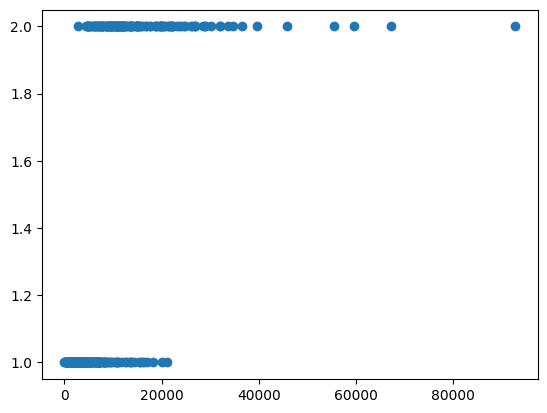

In [5]:
plt.scatter(df['Grocery'], df['Channel'])

In [6]:
df = df['Channel' == 1].drop()

KeyError: False

In [ ]:
filtered_df = df[df['Channel'] == 2]

In [ ]:
filtered_df

In [ ]:
Fresh_sum = df['Fresh'].sum()

In [ ]:
Fresh_sum

In [ ]:
Milk_sum = df['Milk'].sum()
Milk_sum

In [ ]:
Grocery_sum = df['Grocery'].sum()
Grocery_sum

In [ ]:
Frozen_sum = df['Frozen'].sum()
Frozen_sum

In [ ]:
Detergents_Paper_sum = df['Detergents_Paper'].sum()
Detergents_Paper_sum

In [ ]:
Delicassen_sum = df['Delicassen'].sum()
Delicassen_sum

In [ ]:
plt.scatter(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_paper', 'Delicassen'], [Fresh_sum, Milk_sum, Grocery_sum, Frozen_sum, Detergents_Paper_sum, Delicassen_sum])

In [ ]:
df.hist()

In [ ]:
df.describe()

In [ ]:
df.info()

K-means: K, DBSCAN: epsolin, min-sample

In [8]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [23]:
max_values_per_row = df.max(axis=1)
max_values_per_row[0]

12669

In [29]:
max_col_per_row = df.idxmax(axis=1)
max_col_per_row

0        Fresh
1         Milk
2         Milk
3        Fresh
4        Fresh
        ...   
435      Fresh
436      Fresh
437    Grocery
438      Fresh
439      Fresh
Length: 440, dtype: object

In [51]:
all_customers = []

for col_name in max_col_per_row:    
    all_customers.append(col_name)

In [40]:
all_customers

['Fresh',
 'Milk',
 'Milk',
 'Fresh',
 'Fresh',
 'Fresh',
 'Fresh',
 'Grocery',
 'Grocery',
 'Grocery',
 'Grocery',
 'Fresh',
 'Fresh',
 'Fresh',
 'Fresh',
 'Fresh',
 'Grocery',
 'Milk',
 'Fresh',
 'Grocery',
 'Fresh',
 'Fresh',
 'Fresh',
 'Milk',
 'Fresh',
 'Fresh',
 'Fresh',
 'Fresh',
 'Grocery',
 'Fresh',
 'Fresh',
 'Milk',
 'Fresh',
 'Fresh',
 'Grocery',
 'Grocery',
 'Fresh',
 'Fresh',
 'Grocery',
 'Fresh',
 'Fresh',
 'Fresh',
 'Grocery',
 'Grocery',
 'Grocery',
 'Milk',
 'Grocery',
 'Grocery',
 'Fresh',
 'Grocery',
 'Fresh',
 'Grocery',
 'Fresh',
 'Grocery',
 'Fresh',
 'Fresh',
 'Milk',
 'Grocery',
 'Fresh',
 'Grocery',
 'Fresh',
 'Grocery',
 'Fresh',
 'Grocery',
 'Fresh',
 'Grocery',
 'Grocery',
 'Fresh',
 'Milk',
 'Fresh',
 'Fresh',
 'Grocery',
 'Frozen',
 'Fresh',
 'Grocery',
 'Fresh',
 'Frozen',
 'Grocery',
 'Fresh',
 'Grocery',
 'Fresh',
 'Grocery',
 'Grocery',
 'Fresh',
 'Fresh',
 'Grocery',
 'Milk',
 'Fresh',
 'Frozen',
 'Fresh',
 'Fresh',
 'Fresh',
 'Grocery',
 'Frozen',
 

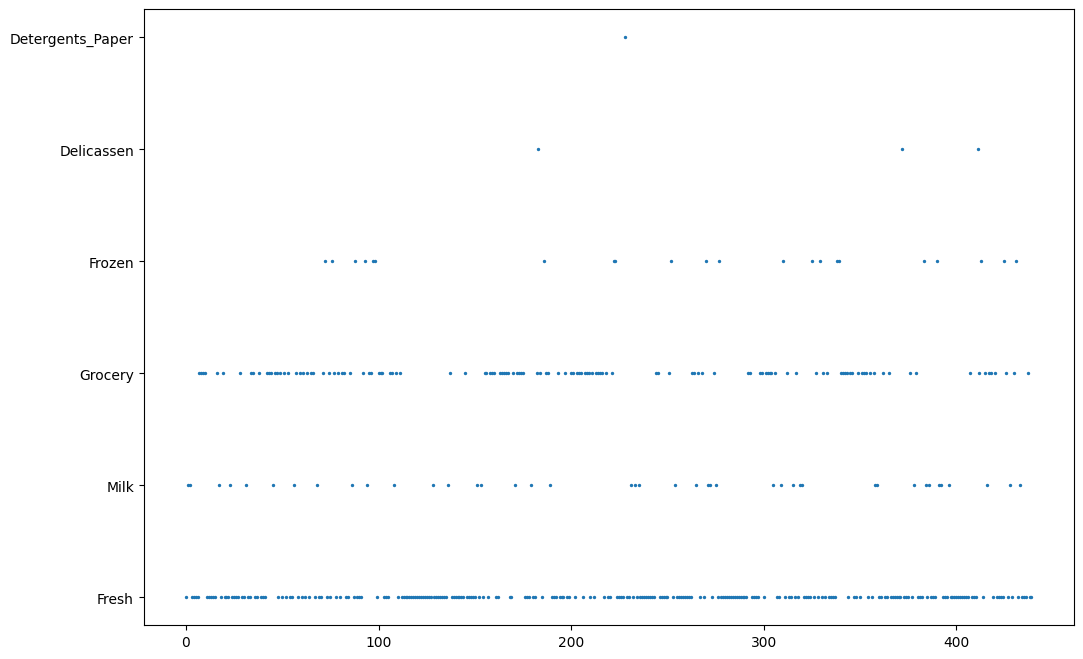

In [44]:
plt.figure(figsize=(12, 8))
plt.scatter(df.index, all_customers, s=2)

In [53]:
df = pd.DataFrame({
    'Customer': range(440),
    'Product': ['Fresh', 'Milk', 'Milk', 'Fresh', 'Fresh', 'Fresh', 'Fresh', 'Grocery', 'Grocery', 'Grocery', 'Grocery', 'Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', 'Grocery', 'Milk', 'Fresh', 'Grocery']
})

# Grouping customers by product
grouped = df.groupby('Product')['Customer'].apply(list)

# Create plot
plt.figure(figsize=(10, 6))

# Scatter plot for each product
for i, (product, customers) in enumerate(grouped.items()):
    plt.scatter(customers, [product] * len(customers), label=product)

plt.xlabel('Customer Index')
plt.ylabel('Product')
plt.title('Customers by Product')

plt.yticks(range(len(grouped)), grouped.index)  # Setting y-axis ticks as product names
plt.legend()
plt.tight_layout()
plt.show()

ValueError: All arrays must be of the same length

In [58]:
products = ['Fresh', 'Milk', 'Milk', 'Fresh', 'Fresh', 'Fresh', 'Fresh', 'Grocery', 'Grocery', 'Grocery', 
            'Grocery', 'Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', 'Grocery', 'Milk', 'Fresh', 'Grocery']

# Create DataFrame
df = pd.DataFrame({
    'Customer': range(len(products)),
    'Product': products
})

In [59]:
grouped = df.groupby('Product')['Customer'].apply(list)

In [60]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

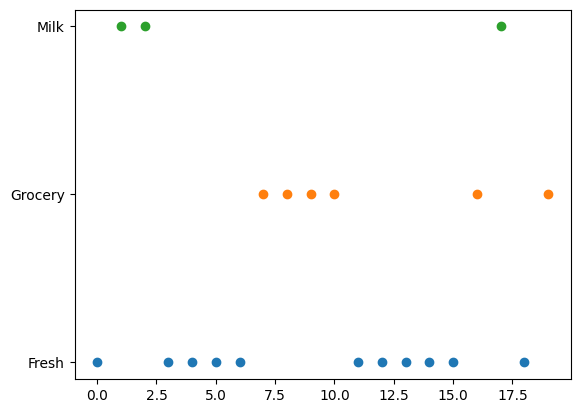

In [61]:
for i, (product, customers) in enumerate(grouped.items()):
    plt.scatter(customers, [product] * len(customers), label=product)